In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calplot

In [11]:
my_streams = pd.read_csv('../song_streaming_history.csv')
my_streams = my_streams.drop(columns = ['Unnamed: 0'])

In [16]:
my_streams.head()

,name,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,artist_name,end_time,ms_played,mins_played
0,Drag Me Down,3pDek256ZgaPcii9t9o4dv,0.711,0.729,8,-4.462,1,0.0822,0.0542,0.0,0.0822,0.363,138.099,189226,One Direction,2023-03-14 12:36,133758,2.23
1,Drag Me Down,3pDek256ZgaPcii9t9o4dv,0.711,0.729,8,-4.462,1,0.0822,0.0542,0.0,0.0822,0.363,138.099,189226,One Direction,2023-09-09 18:37,192120,3.20
2,Drag Me Down,3pDek256ZgaPcii9t9o4dv,0.711,0.729,8,-4.462,1,0.0822,0.0542,0.0,0.0822,0.363,138.099,189226,One Direction,2023-11-06 20:12,56690,0.94
3,Balam Pichkari,18e3XXYCv4Tx8uUl1mP3CN,0.732,0.944,0,-4.115,1,0.0900,0.2090,0.0,0.4010,0.957,120.020,288903,Pritam,2023-03-17 05:13,1184,0.02
4,Balam Pichkari,18e3XXYCv4Tx8uUl1mP3CN,0.732,0.944,0,-4.115,1,0.0900,0.2090,0.0,0.4010,0.957,120.020,288903,Pritam,2023-04-09 14:19,117446,1.96


In [53]:
my_streams['mins_played'] = my_streams.apply(lambda x: round(x['ms_played']/60000, 2), axis = 1)
my_streams['date'] = my_streams.apply(lambda x: pd.to_datetime(x['end_time'][:10], format = '%Y-%m-%d'), axis = 1)
my_streams.head()
                                                               

,name,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,artist_name,end_time,ms_played,mins_played,date
0,Drag Me Down,3pDek256ZgaPcii9t9o4dv,0.711,0.729,8,-4.462,1,0.0822,0.0542,0.0,0.0822,0.363,138.099,189226,One Direction,2023-03-14 12:36,133758,2.23,2023-03-14
1,Drag Me Down,3pDek256ZgaPcii9t9o4dv,0.711,0.729,8,-4.462,1,0.0822,0.0542,0.0,0.0822,0.363,138.099,189226,One Direction,2023-09-09 18:37,192120,3.20,2023-09-09
2,Drag Me Down,3pDek256ZgaPcii9t9o4dv,0.711,0.729,8,-4.462,1,0.0822,0.0542,0.0,0.0822,0.363,138.099,189226,One Direction,2023-11-06 20:12,56690,0.94,2023-11-06
3,Balam Pichkari,18e3XXYCv4Tx8uUl1mP3CN,0.732,0.944,0,-4.115,1,0.0900,0.2090,0.0,0.4010,0.957,120.020,288903,Pritam,2023-03-17 05:13,1184,0.02,2023-03-17
4,Balam Pichkari,18e3XXYCv4Tx8uUl1mP3CN,0.732,0.944,0,-4.115,1,0.0900,0.2090,0.0,0.4010,0.957,120.020,288903,Pritam,2023-04-09 14:19,117446,1.96,2023-04-09


In [20]:
daily_length = my_streams.groupby('date', as_index=True).sum()

,name,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,artist_name,end_time,ms_played,mins_played
date,,,,,,,,,,,,,,,,,,
2023-03-14,Drag Me Down,3pDek256ZgaPcii9t9o4dv,0.711,0.729,8,-4.462,1,0.0822,0.054200,0.000000,0.0822,0.363,138.099,189226,One Direction,2023-03-14 12:36,133758,2.23
2023-03-17,Balam PichkariIlahiBadtameez DilBadtameez DilK...,18e3XXYCv4Tx8uUl1mP3CN5cgKosPPj5Cs9a2JQufUc14e...,28.894,32.253,250,-278.668,31,4.0692,13.153042,1.296830,7.3012,26.796,5375.339,10063297,PritamPritamPritamPritamPritamPritamPritamPrit...,2023-03-17 05:132023-03-17 05:132023-03-17 05:...,4155117,69.24
2023-03-22,"Happy NowMood (Remix) feat. Justin Bieber, J B...",4keoy2fqgwGnbWlm3ZVZFa6FuGJB290AQMAHTfjOYVaK5G...,42.068,41.993,339,-386.639,37,4.6998,18.753790,0.127757,11.6168,34.500,7117.982,12937593,Zedd24kGoldnHailee SteinfeldPritamImagine Drag...,2023-03-22 06:142023-03-22 10:312023-03-22 06:...,5969020,99.46
2023-03-24,"Ghodey Pe Sawaar (From ""Qala"")",1a8w8nlIyIhE2W1HIayKnl,0.777,0.481,3,-6.127,1,0.0274,0.794000,0.000042,0.2650,0.814,102.003,193832,Amit Trivedi,2023-03-24 19:10,10240,0.17
2023-03-25,"KabiraCharacter Dheela 2.0 (From ""Shehzada"")Gh...",3jJ5HgLRNydtLRghjWVaCG24AfLjMMgO8AjhQw8l7y1L1a...,9.644,8.935,86,-93.011,7,0.9562,6.682400,0.020240,2.0842,7.201,1565.506,3338851,PritamPritamAmit TrivediAnkit TiwariKingTanish...,2023-03-25 18:302023-03-25 08:582023-03-25 08:...,1183988,19.75


In [45]:
idx = pd.DataFrame(pd.date_range(min(my_streams.date), max(my_streams.date)), columns = ['date'])
idx['date'] = my_streams.apply(lambda x: pd.to_datetime(x['date'], format = '%Y-%m-%d'), axis = 1)

new_daily_length = pd.merge(idx, daily_length, how = 'left', left_on = 'date', right_on = 'date', copy = False)
new_daily_length = new_daily_length.filter(['date', 'mins_played'])
new_daily_length.head()

,date,mins_played
0,2023-03-14,2.23
1,2023-09-09,233.62
2,2023-11-06,74.03
3,2023-03-17,69.24
4,2023-04-09,63.06


In [46]:
new_daily_length.index = new_daily_length.date
new_daily_length = new_daily_length.drop(columns=['date'])
new_daily_length.head()

,mins_played
date,
2023-03-14,2.23
2023-09-09,233.62
2023-11-06,74.03
2023-03-17,69.24
2023-04-09,63.06


In [47]:
new_daily_length = new_daily_length.squeeze()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 2000x1000 with 3 Axes>,
 array([<Axes: ylabel='2023'>, <Axes: ylabel='2024'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


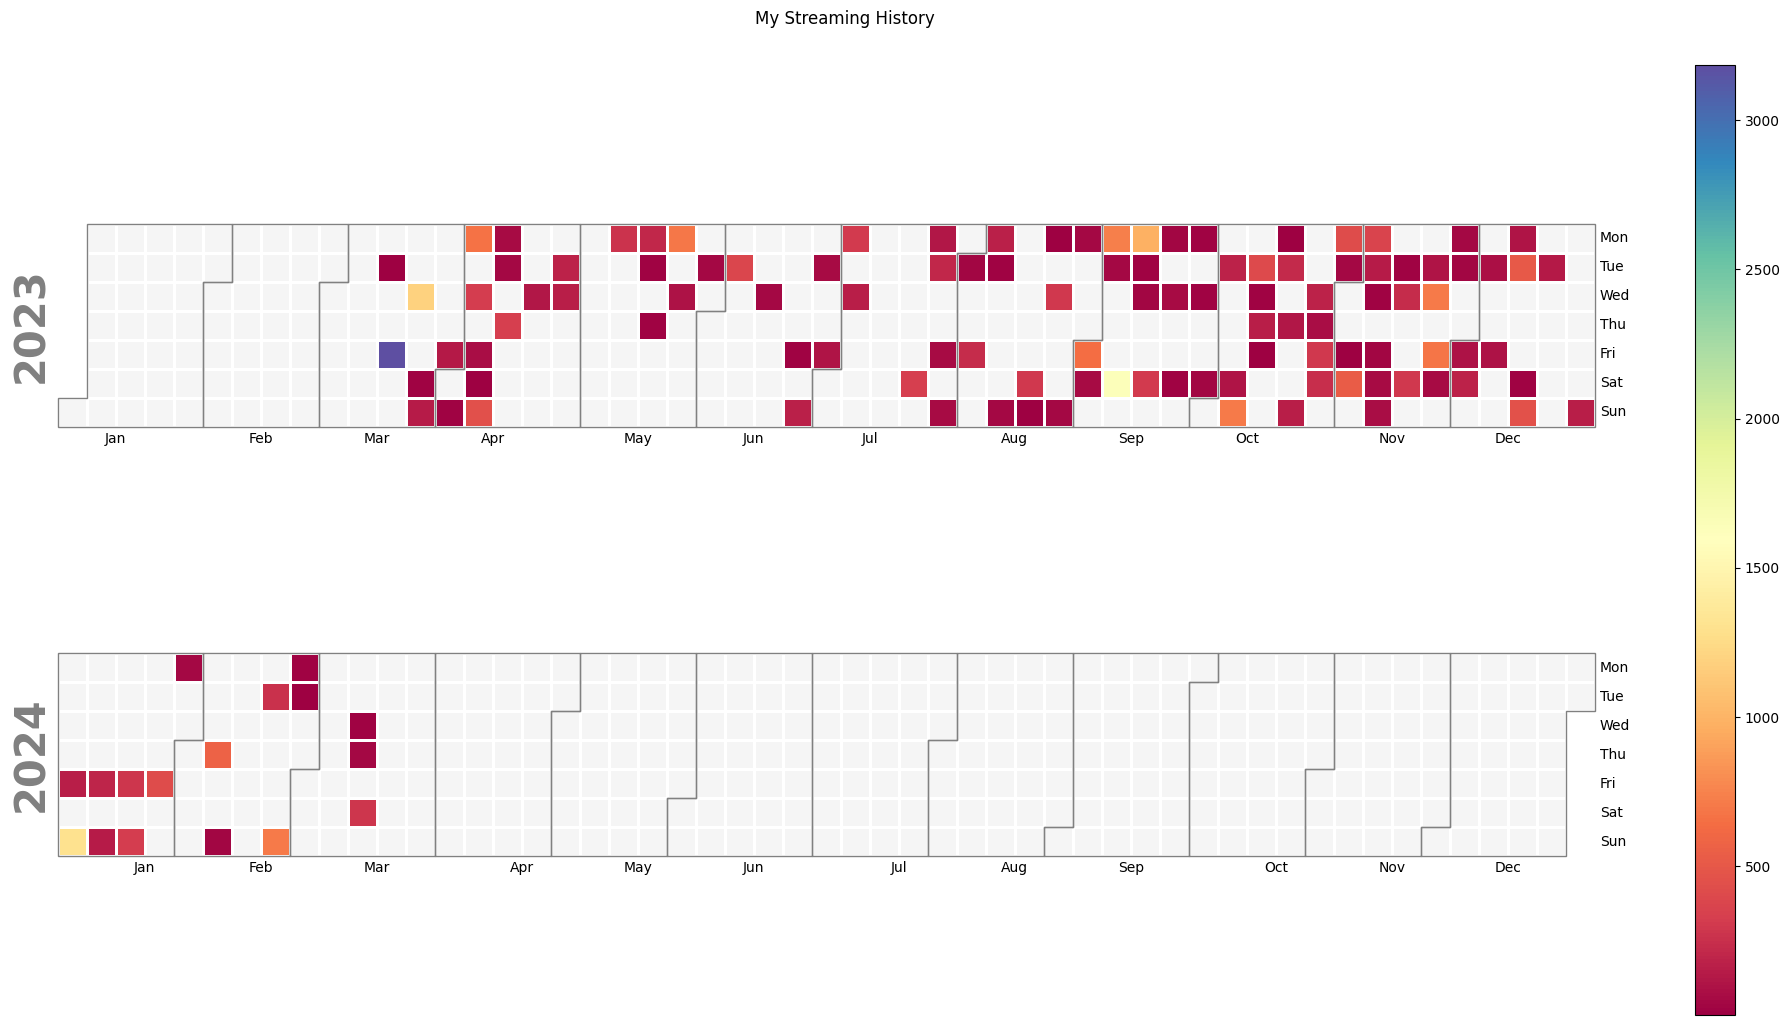

In [86]:
calplot.calplot(new_daily_length, figsize=(20, 10), suptitle='My Streaming History', cmap='Spectral')

In [72]:
artist_df = my_streams.filter(['artist_name', 'name', 'ms_played', 'mins_played'])
artist_length = artist_df.groupby('artist_name',as_index=False).sum()
artist_song_cnt = artist_df.groupby('artist_name',as_index=False).agg({'name': 'nunique'})
artist_song_cnt

,artist_name,name
0,24kGoldn,2
1,5 Seconds of Summer,2
2,50 Cent,1
3,7Bantai'Z,1
4,A.R. Rahman,17
...,...,...
509,Zeus X Crona,1
510,benny blanco,1
511,fun.,1
512,mgk,11


In [77]:
artist_final_df = pd.merge(artist_length, artist_song_cnt, how='left', on='artist_name', copy=True)
artist_final_df.rename(columns={'name_y':'unique_track_number'},inplace=True)
artist_final_df = artist_final_df.drop(columns = ['name_x'])

In [78]:
max_time = artist_final_df.sort_values(by=['ms_played'])
max_time.tail()

,artist_name,ms_played,mins_played,unique_track_number
494,Walk off the Earth,13924970,231.97,3
69,Badshah,15463853,257.82,26
392,Sachin-Jigar,21830573,363.75,12
61,Avicii,22825548,380.36,12
350,Pritam,126386005,2106.52,97


In [79]:
most_heard_30 = max_time.tail(10)

/tmp/ipykernel_137076/2212246149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = most_heard_30['artist_name'], x = most_heard_30['mins_played'], palette='rocket_r')


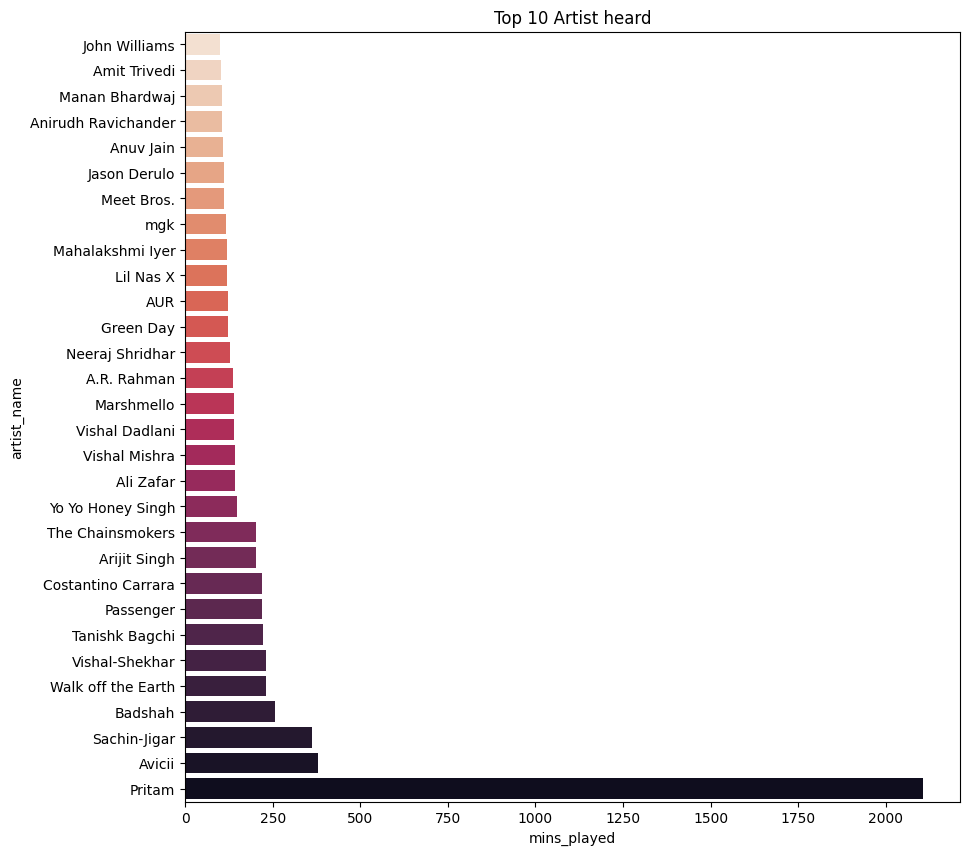

In [81]:
plt.rcParams["figure.figsize"] = (10,10)
sns.barplot(y = most_heard_30['artist_name'], x = most_heard_30['mins_played'], palette='rocket_r')
plt.title('Top 10 Artist heard')
plt.show()

In [89]:
max_songs = artist_final_df.loc[artist_final_df['unique_track_number'] > 10]

/tmp/ipykernel_137076/1476489821.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = max_songs['artist_name'], x = max_songs['unique_track_number'], palette='rocket_r')


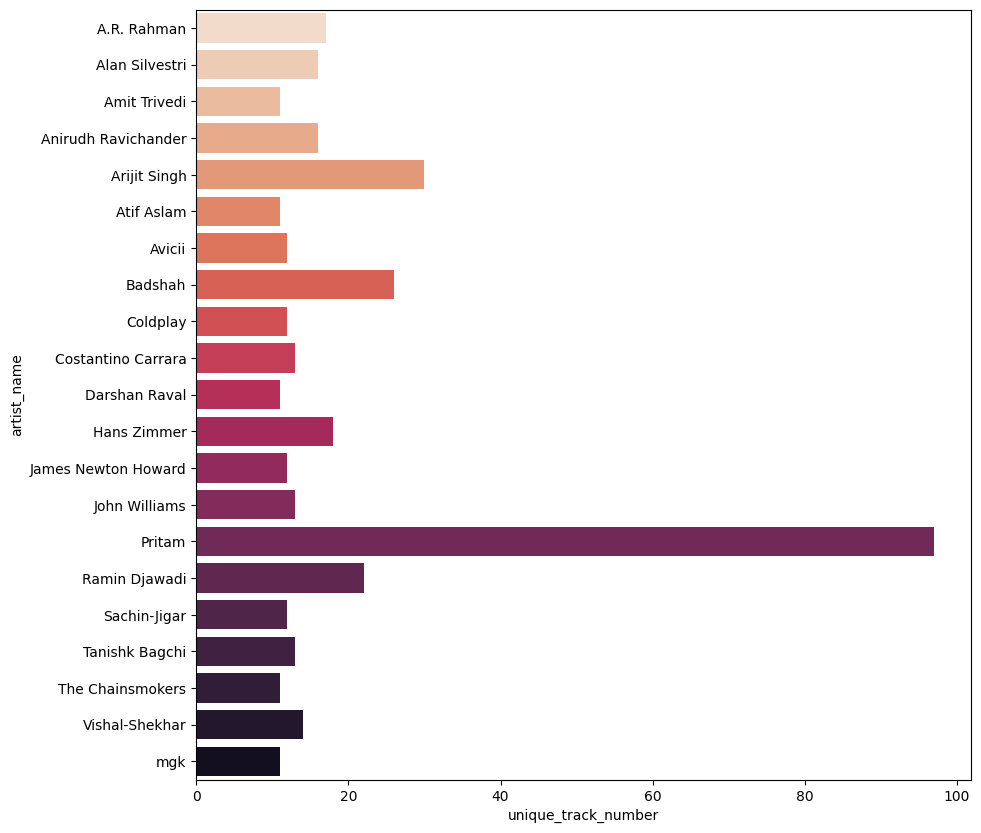

In [90]:
sns.barplot(y = max_songs['artist_name'], x = max_songs['unique_track_number'], palette='rocket_r')
plt.rcParams["figure.figsize"] = (10,10)

In [92]:
idx = pd.DataFrame(pd.date_range(min(my_streams.date), max(my_streams.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

In [93]:
valence = my_streams.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])

/tmp/ipykernel_137076/3317080341.py:1: FutureWarning: The provided callable <function mean at 0x785fa6301120> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  valence = my_streams.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])


In [107]:
val = pd.merge(idx, valence, how='left', left_on='date', right_on = 'date', copy=False)
val = val[val['mean'].notna()]
val.head()

,date,min,mean,max
0,2023-03-14,0.363,0.363000,0.363
3,2023-03-17,0.125,0.582522,0.957
8,2023-03-22,0.137,0.539062,0.890
10,2023-03-24,0.814,0.814000,0.814
11,2023-03-25,0.130,0.514357,0.898


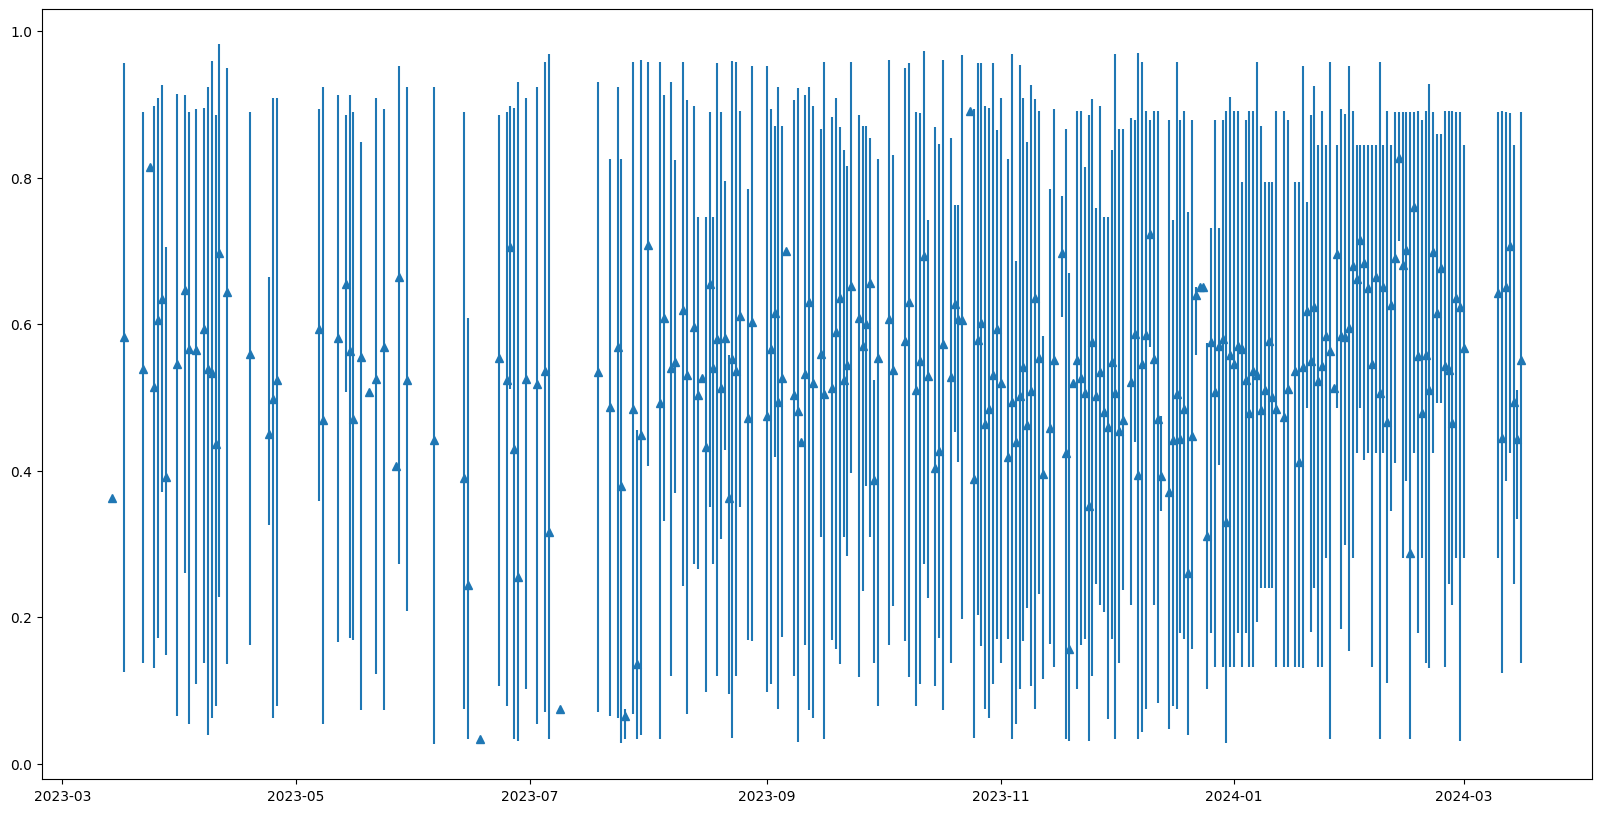

In [108]:
plt.rcParams["figure.figsize"] = (20,10)
plt.errorbar(val["date"],val["mean"], [val["mean"] - val['min'],val['max']-val["mean"]], linestyle='None',marker='^')
plt.show()

In [109]:
energy = my_streams.groupby('date')['energy'].aggregate(['min', np.mean, 'max'])
dance = my_streams.groupby('date')['danceability'].aggregate(['min', np.mean, 'max'])

/tmp/ipykernel_137076/3537092979.py:1: FutureWarning: The provided callable <function mean at 0x785fa6301120> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  energy = my_streams.groupby('date')['energy'].aggregate(['min', np.mean, 'max'])
/tmp/ipykernel_137076/3537092979.py:2: FutureWarning: The provided callable <function mean at 0x785fa6301120> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dance = my_streams.groupby('date')['danceability'].aggregate(['min', np.mean, 'max'])


In [112]:
d = pd.merge(idx, energy, how='left', left_on='date', right_on = 'date', copy=False)
e = pd.merge(idx, dance, how='left', left_on='date', right_on = 'date', copy=False)
d = d[d['mean'].notna()]
e = e[e['mean'].notna()]

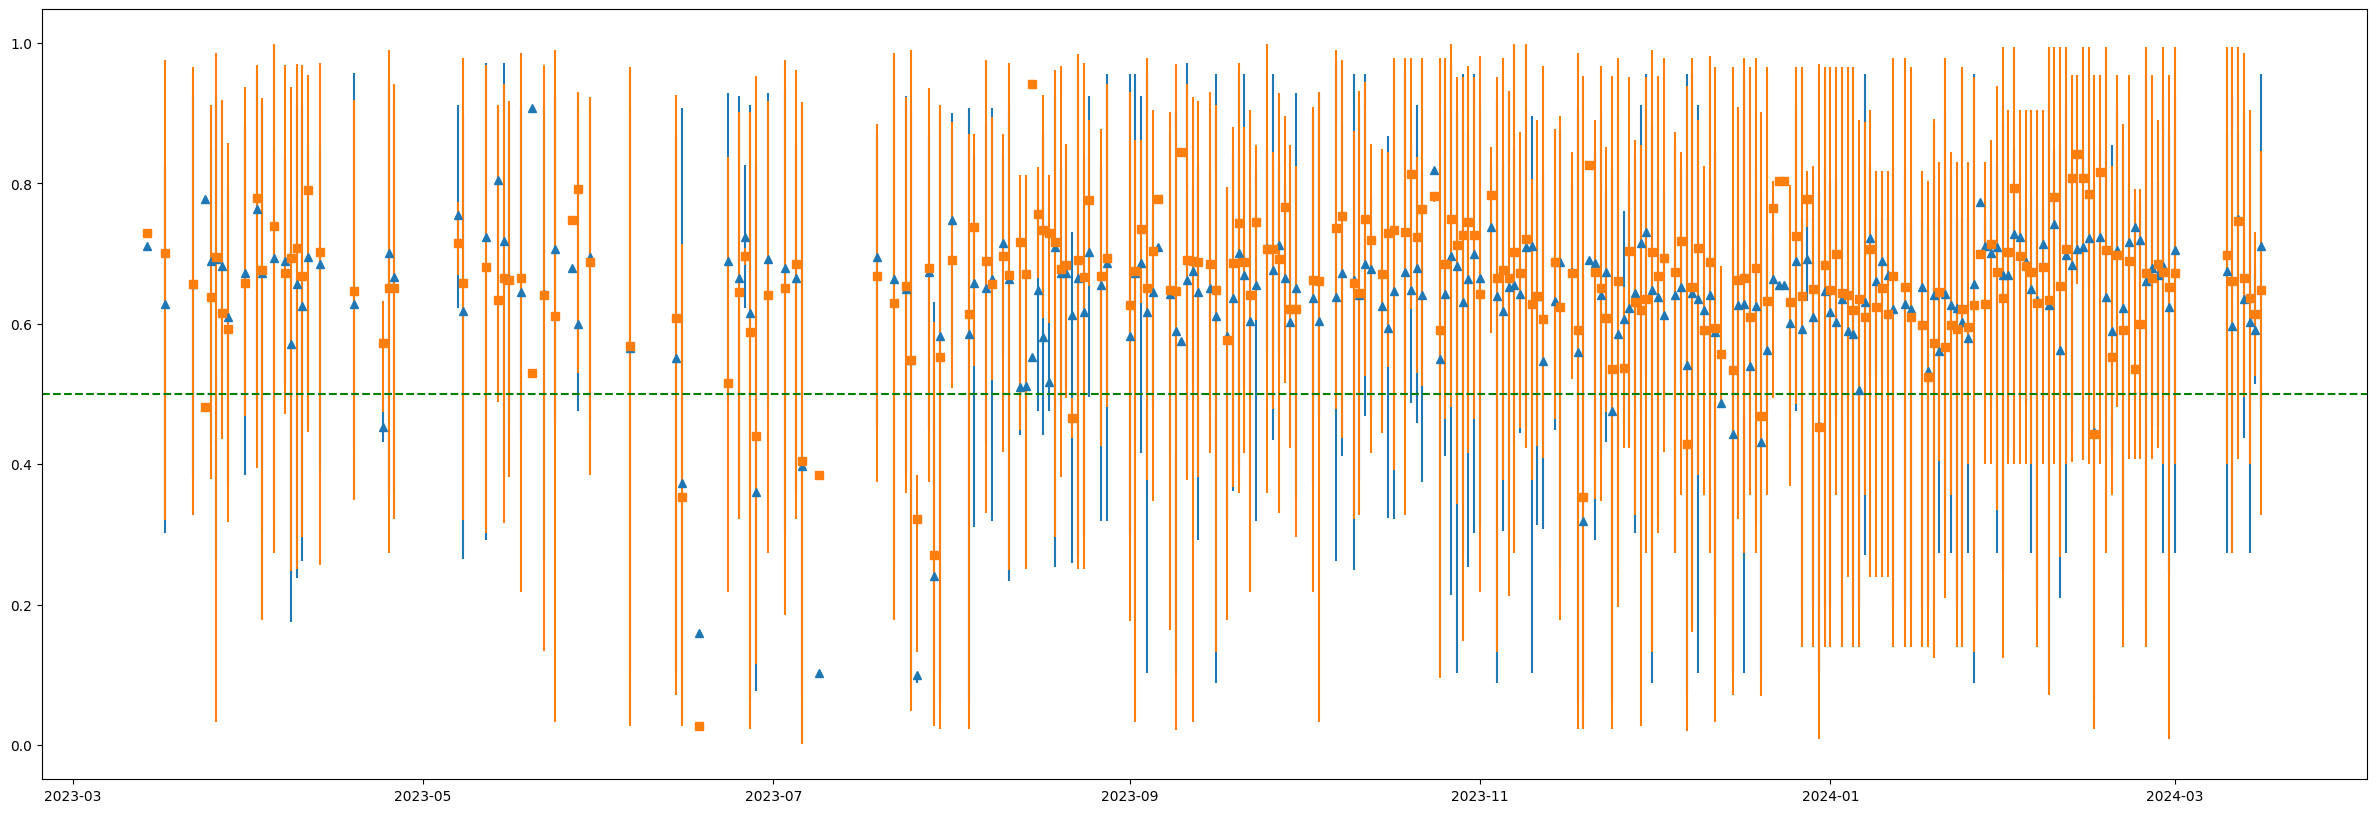

In [113]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(e["date"],e["mean"], [e["mean"] - e['min'],e['max']-e["mean"]], linestyle='None',marker='^')
plt.errorbar(d["date"],d["mean"], [d["mean"] - d['min'],d['max']-d["mean"]], linestyle='None',marker='s')
plt.axhline(y=0.5, color='green', linestyle='dashed')
plt.show()

In [129]:
distinct_song = pd.read_csv('../feature_complete_final_data.csv')
distinct_song = distinct_song.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y'])
distinct_song.head()

,name,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,end_time,ms_played,artist_name
0,Drag Me Down,3pDek256ZgaPcii9t9o4dv,0.711,0.729,8,-4.462,1,0.0822,0.0542,0.000000,...,138.099,audio_features,spotify:track:3pDek256ZgaPcii9t9o4dv,https://api.spotify.com/v1/tracks/3pDek256ZgaP...,https://api.spotify.com/v1/audio-analysis/3pDe...,189226,4,2023-11-06 20:12,382568,One Direction
1,Balam Pichkari,18e3XXYCv4Tx8uUl1mP3CN,0.732,0.944,0,-4.115,1,0.0900,0.2090,0.000000,...,120.020,audio_features,spotify:track:18e3XXYCv4Tx8uUl1mP3CN,https://api.spotify.com/v1/tracks/18e3XXYCv4Tx...,https://api.spotify.com/v1/audio-analysis/18e3...,288903,4,2023-10-30 16:08,1963538,Pritam
2,Ilahi,5cgKosPPj5Cs9a2JQufUc1,0.593,0.967,9,-5.767,1,0.0907,0.1660,0.000025,...,131.988,audio_features,spotify:track:5cgKosPPj5Cs9a2JQufUc1,https://api.spotify.com/v1/tracks/5cgKosPPj5Cs...,https://api.spotify.com/v1/audio-analysis/5cgK...,228982,4,2023-11-22 11:53,729122,Pritam
3,Badtameez Dil,4eu27jAU2bbnyHUC3G75U8,0.806,0.932,2,-2.228,0,0.0684,0.2400,0.000000,...,106.021,audio_features,spotify:track:4eu27jAU2bbnyHUC3G75U8,https://api.spotify.com/v1/tracks/4eu27jAU2bbn...,https://api.spotify.com/v1/audio-analysis/4eu2...,252760,4,2023-11-06 08:40,874733,Pritam
4,Kabira,3jJ5HgLRNydtLRghjWVaCG,0.611,0.612,2,-7.978,1,0.1140,0.4410,0.000000,...,171.841,audio_features,spotify:track:3jJ5HgLRNydtLRghjWVaCG,https://api.spotify.com/v1/tracks/3jJ5HgLRNydt...,https://api.spotify.com/v1/audio-analysis/3jJ5...,270439,4,2023-11-27 15:22,2516152,Pritam


In [131]:
features = ['danceability', 'energy', 'key', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

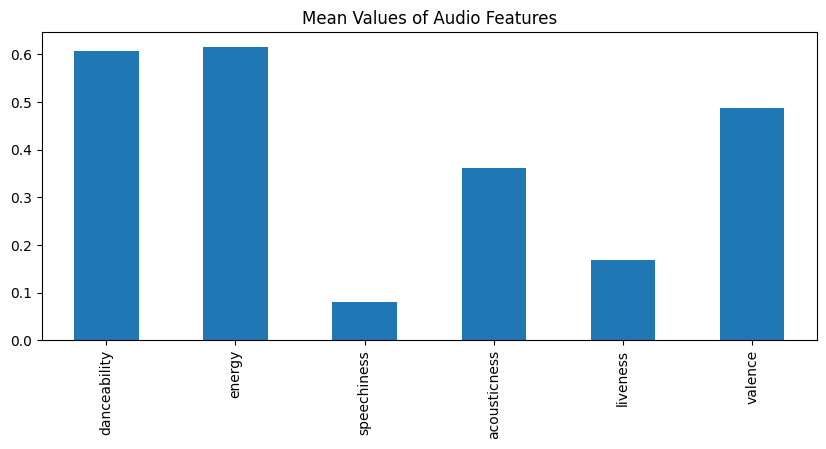

In [136]:
small = distinct_song[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

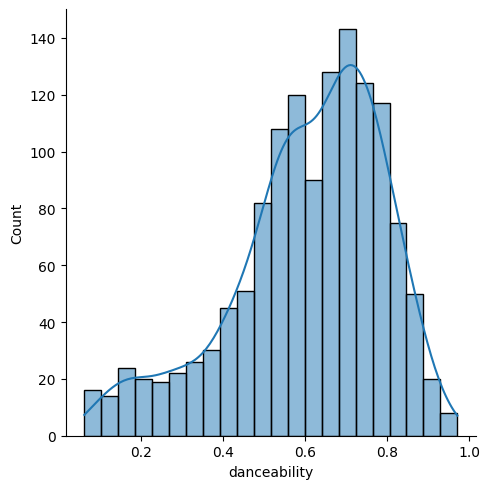

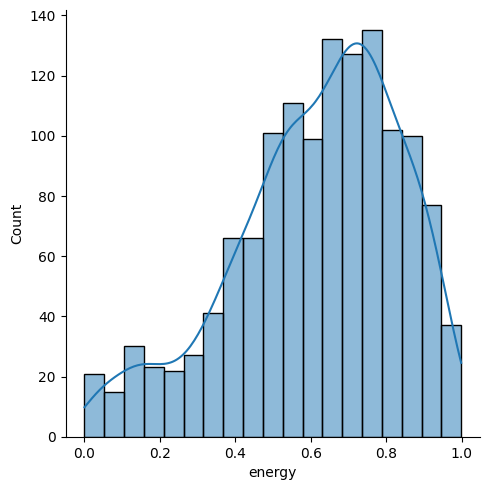

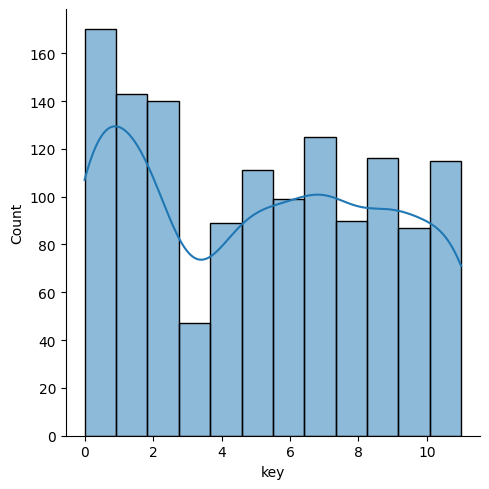

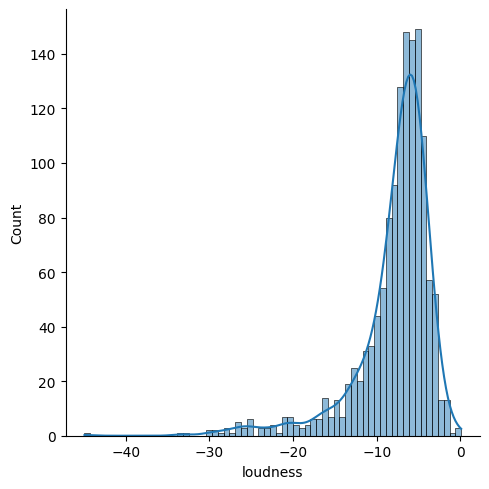

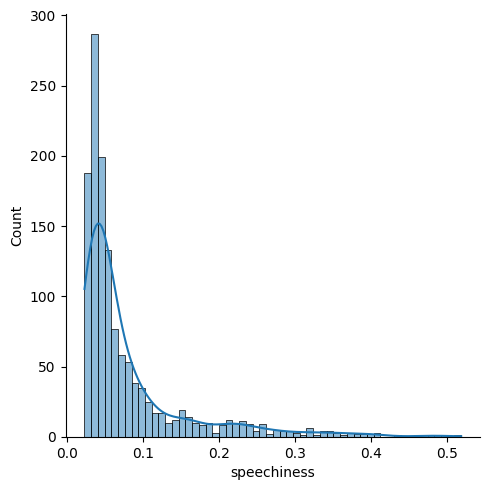

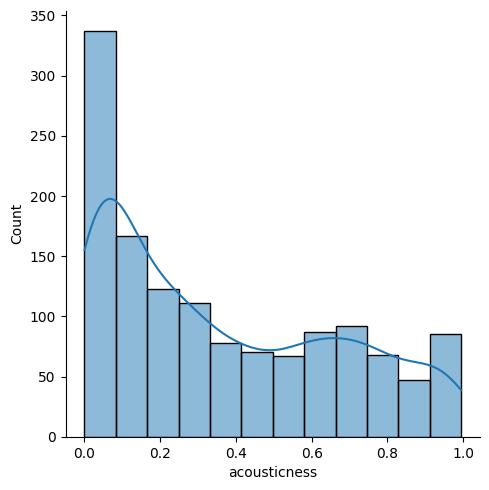

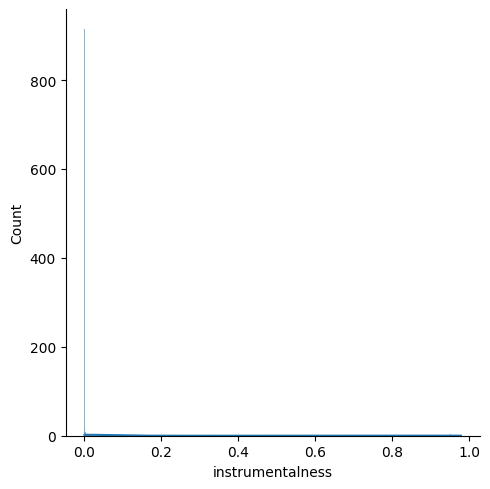

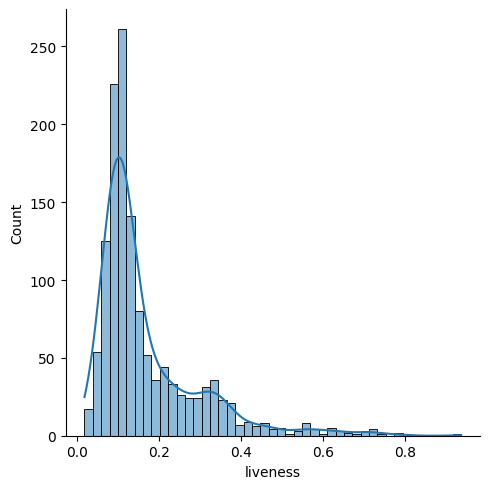

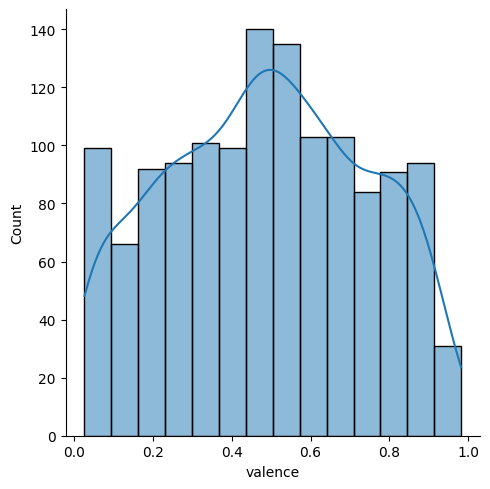

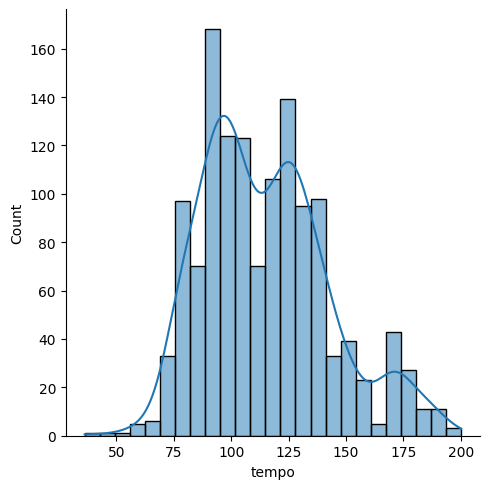

In [124]:
for col in features:
  sns.displot(distinct_song, x=col, kde=True)
  plt.show()

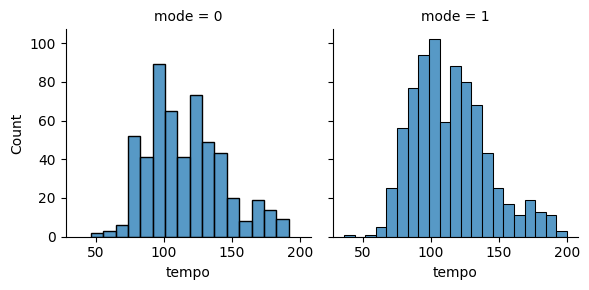

In [123]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(distinct_song, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

<Axes: xlabel='key', ylabel='count'>

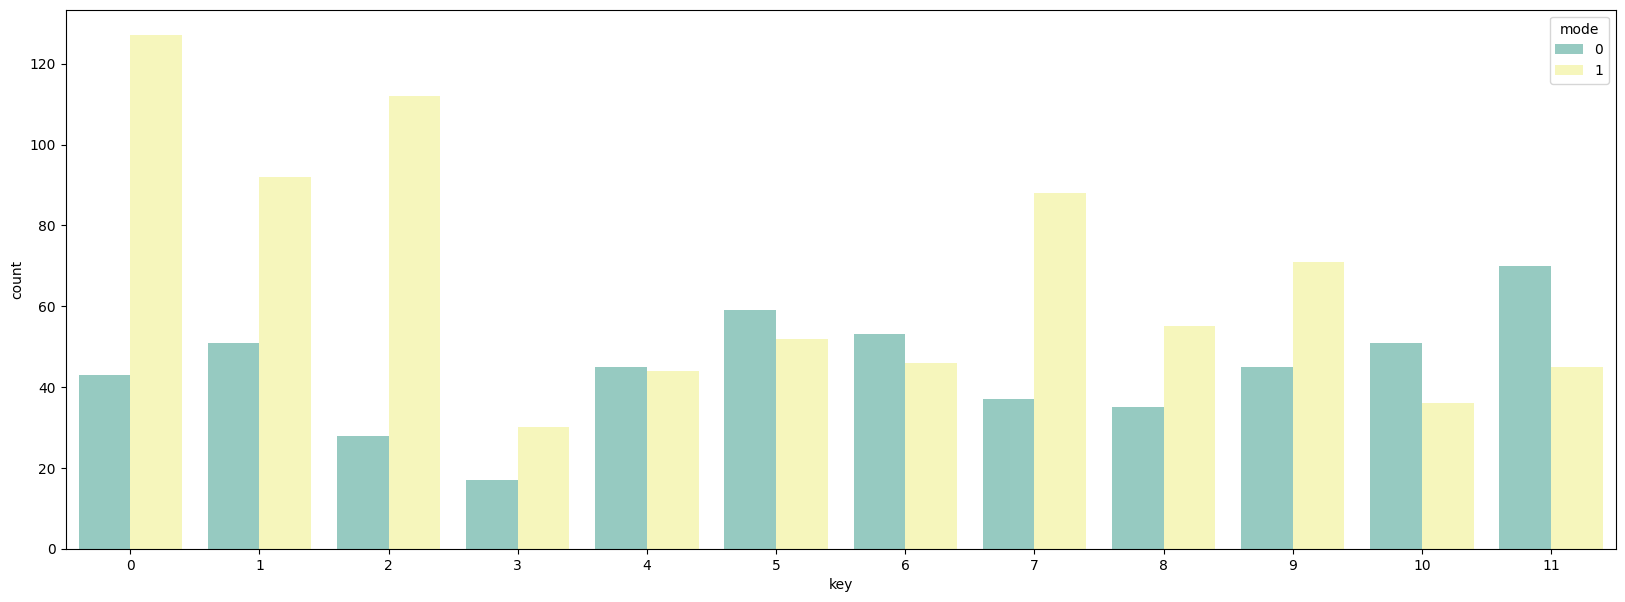

In [132]:
sns.countplot(data=distinct_song, x='key', hue='mode', palette = 'Set3')

<Axes: >

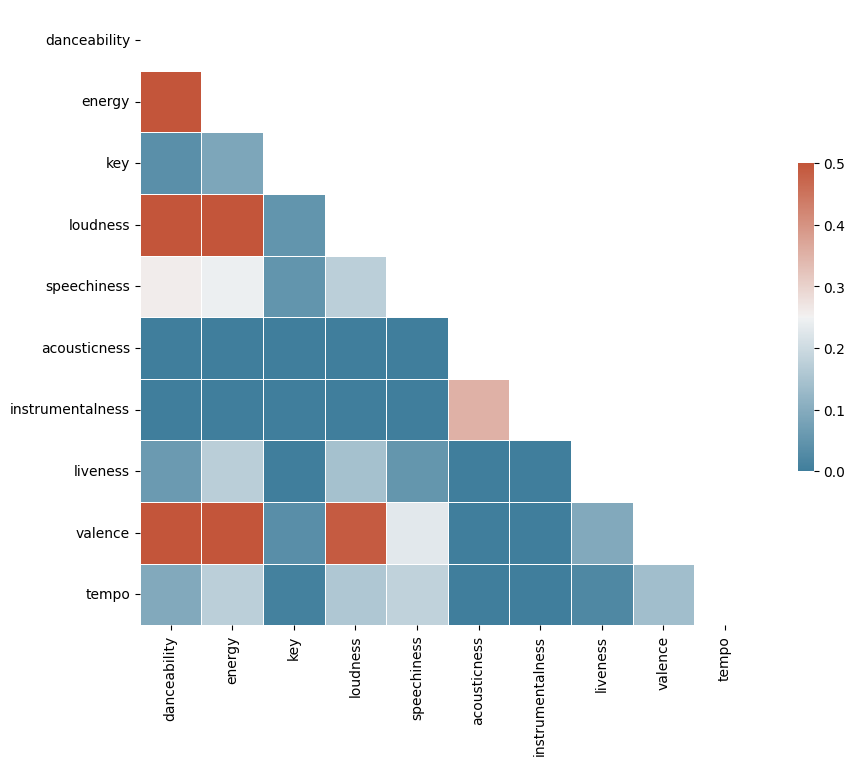

In [138]:
mask = np.triu(np.ones_like(distinct_song[features].corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(distinct_song[features].corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<Axes: xlabel='danceability', ylabel='loudness'>

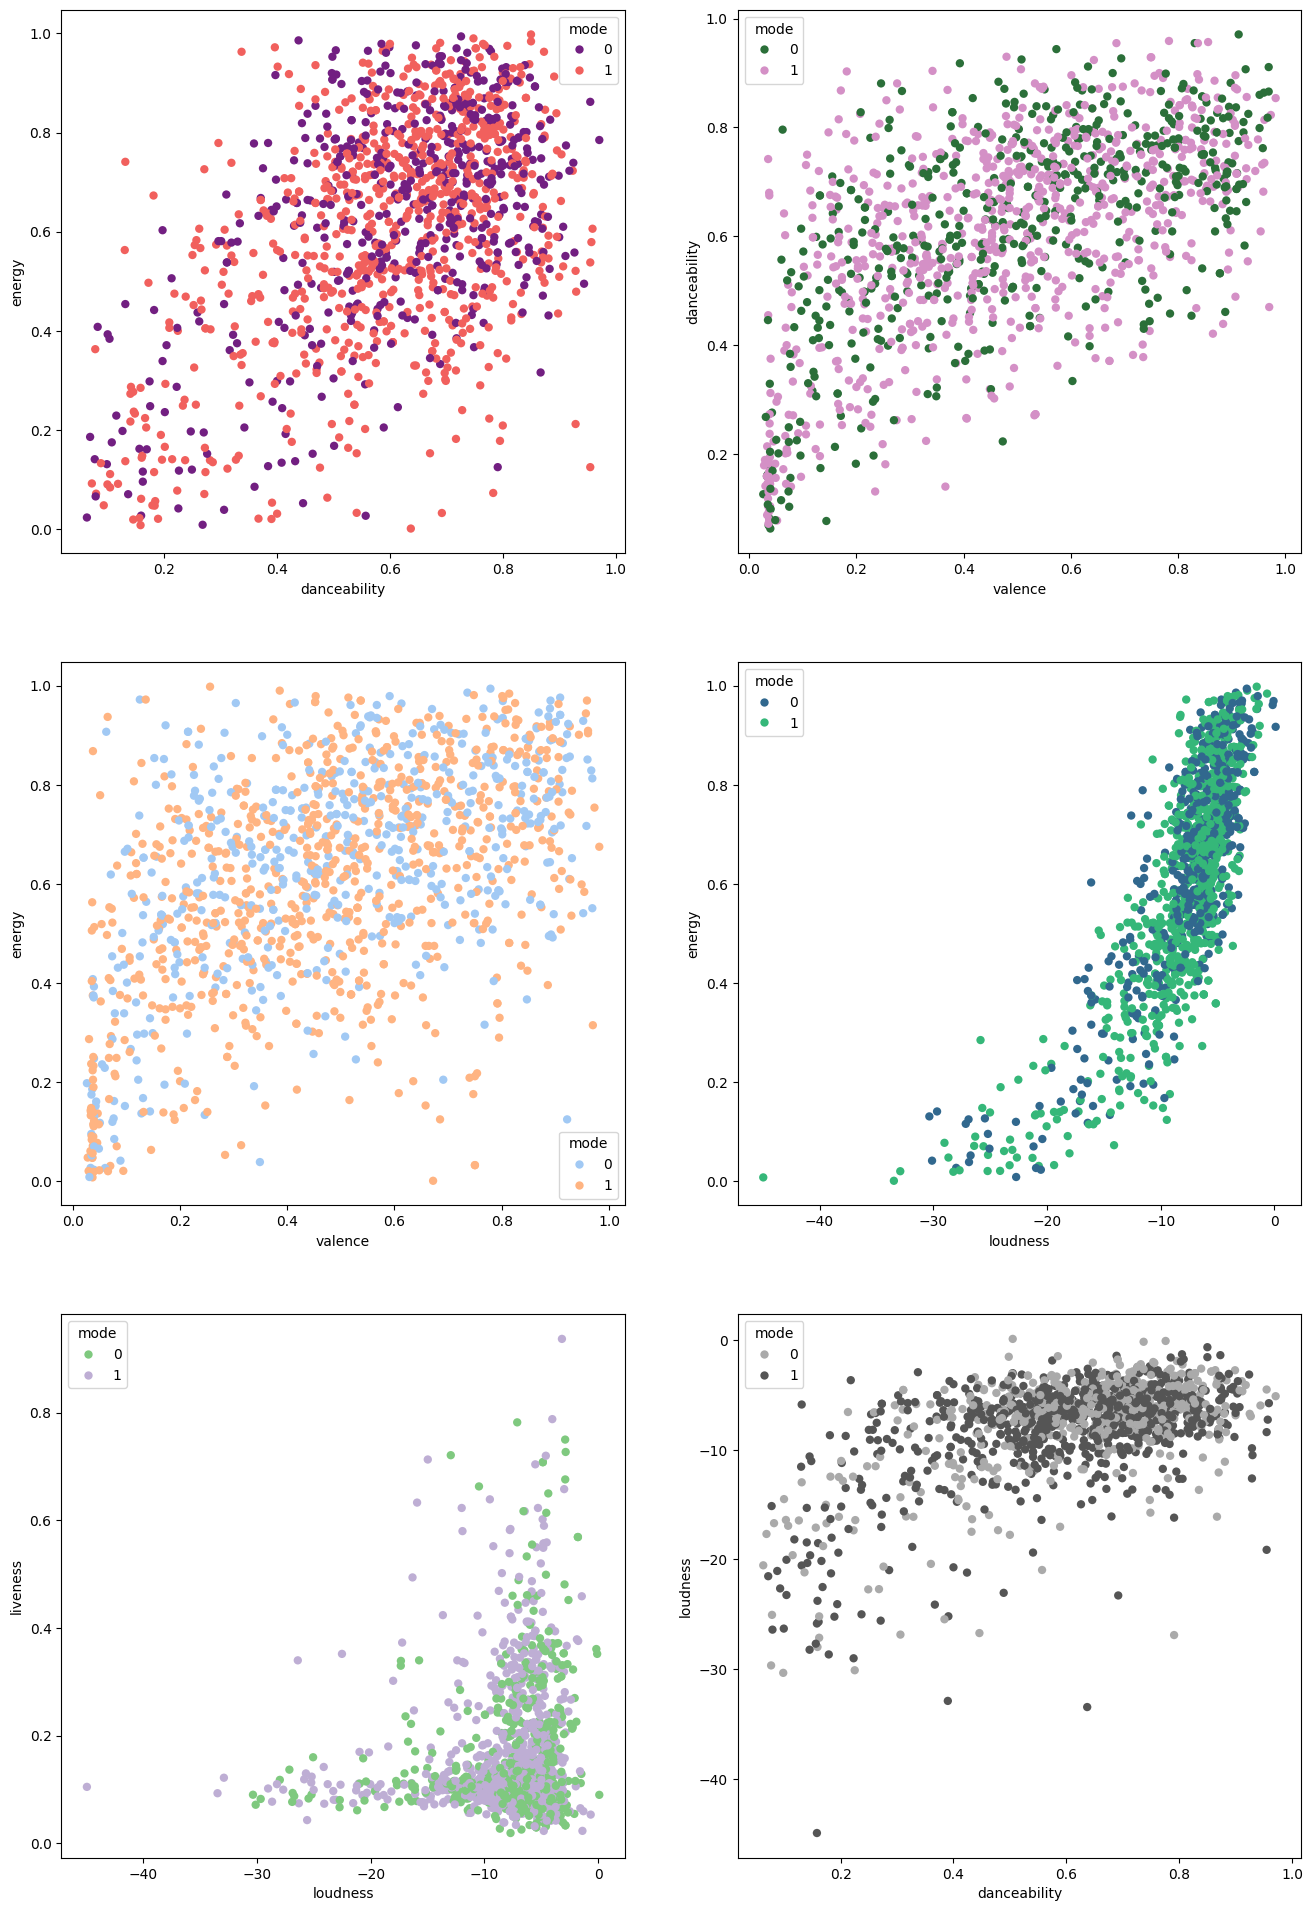

In [141]:
f, ax = plt.subplots(3,2, figsize=(16,24))

sns.scatterplot(x="danceability", y="energy",
                hue="mode", 
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[0][0])

sns.scatterplot(x="valence", y="danceability",
                hue="mode", 
                palette="cubehelix",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[0][1])

sns.scatterplot(x="valence", y="energy",
                hue="mode", 
                palette="pastel",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[1][0])

sns.scatterplot(x="loudness", y="energy",
                hue="mode", 
                palette="viridis",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[1][1])

sns.scatterplot(x="loudness", y="liveness",
                hue="mode", 
                palette="Accent",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[2][0])

sns.scatterplot(x="danceability", y="loudness",
                hue="mode", 
                palette="binary",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[2][1])